<a href="https://colab.research.google.com/github/Gyeong-Hyeon/TOXIC_SPEECH_DETECTION/blob/main/collecting_preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/finalproject/dataset.zip' -d '/content/drive/MyDrive/finalproject/data'

# Jigsaw bias dataset

In [ ]:
import pandas as pd

jigsaw_bias = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\jigsaw-unintended-bias-in-toxicity-classification\\train.csv')
jigsaw_bias

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [ ]:
import numpy as np

jigsaw_bias.target = np.where(jigsaw_bias.target >= 0.5, 1, 0)
jigsaw_bias = jigsaw_bias[['target', 'comment_text']]
jigsaw_bias.target.value_counts()

0    1660540
1     144334
Name: target, dtype: int64

In [ ]:
import numpy as np

jigsaw_bias.target = np.where(jigsaw_bias.target >= 0.7, 1, 0)
jigsaw_bias = jigsaw_bias[['target', 'comment_text']]
jigsaw_bias

,target,comment_text
0,0,"This is so cool. It's like, 'would you want yo..."
1,0,Thank you!! This would make my life a lot less...
2,0,This is such an urgent design problem; kudos t...
3,0,Is this something I'll be able to install on m...
4,1,haha you guys are a bunch of losers.
...,...,...
1804869,0,"Maybe the tax on ""things"" would be collected w..."
1804870,0,What do you call people who STILL think the di...
1804871,0,"thank you ,,,right or wrong,,, i am following ..."
1804872,0,Anyone who is quoted as having the following e...


In [ ]:
jigsaw_bias.target.value_counts()

0    1746200
1      58674
Name: target, dtype: int64

In [ ]:
for i,cmmt in enumerate(jigsaw_bias.comment_text):
    print(cmmt)
    if i == 10:
        break    

This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!
Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!
This is such an urgent design problem; kudos to you for taking it on. Very impressive!
Is this something I'll be able to install on my site? When will you be releasing it?
haha you guys are a bunch of losers.
ur a sh*tty comment.
hahahahahahahahhha suck it.
FFFFUUUUUUUUUUUUUUU
The ranchers seem motivated by mostly by greed; no one should have the right to allow their animals destroy public land.
It was a great show. Not a combo I'd of expected to be good together but it was.
Wow, that sounds great.


In [ ]:
jigsaw_tar = jigsaw_bias[(jigsaw_bias.target == 1)]
jigsaw_tar

,target,comment_text
4,1,haha you guys are a bunch of losers.
31,1,Yet call out all Muslims for the acts of a few...
34,1,This bitch is nuts. Who would read a book by a...
123,1,Took this as an opportunity to check back in o...
289,1,You're an idiot.
...,...,...
1804738,1,Deserves his punishment.
1804753,1,I saved where I could because my children matt...
1804825,1,Who is the jerk in the last row between the C ...
1804838,1,Nobody really cares that she supports the scie...


In [ ]:
jigsaw = jigsaw_bias[(jigsaw_bias.target == 0)]
jigsaw = jigsaw.sample(n=9000,random_state=10)
jigsaw

,target,comment_text
731257,0,How so. I don't remember ever filling out net ...
313778,0,"Yes, Michael Schill, and the colleagues demand..."
396276,0,"Personal abuse doesn't win a debate, Lamont. ..."
1728372,0,LW1: In the olden days when it was cheaper to ...
176412,0,Why is it that parks were created to protect t...
...,...,...
768355,0,What a tainted agenda driven report. So instea...
522101,0,How is that human rights file coming?....and t...
1378976,0,"""Additional information, including if there we..."
956303,0,How do you leak something that hasn't been sai...


In [ ]:
jigsaw = jigsaw.rename(columns={'comment_text':'cmmt_list'})
jigsaw['cmmt_list'] = jigsaw['cmmt_list'].apply(lambda x: [x])
context_2 = pd.concat([jigsaw,context])
context_2

,target,cmmt_list
731257,0,[How so. I don't remember ever filling out net...
313778,0,"[Yes, Michael Schill, and the colleagues deman..."
396276,0,"[Personal abuse doesn't win a debate, Lamont. ..."
1728372,0,[LW1: In the olden days when it was cheaper to...
176412,0,[Why is it that parks were created to protect ...
...,...,...
30812,0,"[Lol, these people are really out there claimi..."
30813,0,"[saw this on Reddit, This is such a terrible b..."
30814,0,[Is this really how our men should be spending...
30815,0,[Because you lame-ass #MAGA-ites believe that ...


# Jigsaw dataset

In [ ]:
import pandas as pd

jigsaw_train = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\jigsaw_train.csv')
jigsaw_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
jigsaw_train['target'] = jigsaw_train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1)
jigsaw_train['target'] = jigsaw_train['target'].apply(lambda x: 1 if x > 0 else x)
jigsaw_train.target.value_counts()

0    143346
1     16225
Name: target, dtype: int64

In [ ]:
jigsaw_train = jigsaw_train[['comment_text','target']]
jigsaw = pd.concat([jigsaw_train,jigsaw_tar])

jigsaw

,comment_text,target
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
1804738,Deserves his punishment.,1
1804753,I saved where I could because my children matt...,1
1804825,Who is the jerk in the last row between the C ...,1
1804838,Nobody really cares that she supports the scie...,1


In [ ]:
jigsaw.target.value_counts()

0    143346
1     74899
Name: target, dtype: int64

In [ ]:
for comment in jigsaw.comment_text:
    if comment.startswith('['):
        print(comment)

[[User_Talk:King Lopez|Lopez]]Contribs
[www.us.terra.com/copa2006/esp/grandes/6251.html This] source appears to say 1968, not 1958. I'll adjust it to 16, accordingly. .
[name of possible attack site]
[Magician&Programmer;|Magician&Programmer;]Yes, why hurt someone greatly (the creator of the effect) and hurt all the performers as well, while not helping anyone?!?! DO YOU GET MONEY TO PUT THE METHOD THERE? That would be illegal! And if you don't, then why should you care?....
[added clarifications; the context is the July 2008 AN/I.   ]
[[Holly wing] 
This article was a  according to the criteria set out in WP:BIO. (aeropagitica)
[edit] Oh Man...you deserve it!!!
  The RickK Anti-Vandalism Barnstar 
For being one of the most consistent and accurate vandal-fighters I have seen here...ever Jmlk17
[Rilla] meaning Religious Inlightment language looping Audio. Definition: Urban people decodeing goverment propaganda Messages through Hiphop and Drum&bass; and other forms of music in moder day 

# GAP

In [ ]:
import pandas as pd

gap = pd.read_csv('https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/gab.csv')
gap

,id,text,hate_speech_idx,response
0,1. 39869714\n,1. i joined gab to remind myself how retarded ...,[1],"[""Using words that insult one group while defe..."
1,1. 39845588\n2. \t39848775\n3. \t\t39911017\n,1. This is what the left is really scared of. ...,[3],['You can disagree with someones opinion witho...
2,1. 37485560\n2. \t37528625\n,1. It makes you an asshole.\n2. \tGive it to a...,[2],['Your argument is more rational if you leave ...
3,1. 39787626\n2. \t39794481\n,1. So they manage to provide a whole lot of da...,[2],"[""You shouldn't generalize a specific group or..."
4,1. 37957930\n2. \t39953348\n3. \t\t39965219\n,"1. Hi there, i,m Keith, i hope you are doing w...",[3],['If someone is rude it is better to ignore th...
...,...,...,...,...
11820,1. 37556347\n2. \t37556710\n,1. Remember this 3 months ago? The intern that...,[2],['Using words that profanely refer to parts of...
11821,1. 38624662\n2. \t38624840\n,1. #Sweden's four major dailies aftonbladet.se...,[2],"['Hey there, derogatory comments are not produ..."
11822,1. 38361617\n2. \t38421472\n3. \t\t38422734\n,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3],['Using words that negatively describes someon...
11823,1. 38710847\n2. \t38711592\n3. \t\t38718122\n,1. Twitter BANNED me and reported me to the FB...,"[2, 3]","[""I don't think using words that are sexist in..."


In [ ]:
c = 0
for t,i,r in zip(gap.text, gap.hate_speech_idx, gap.response):
    print('Text',t,'\nResponse:',r,'\nLabel:',i,'\n*****************************')
    c+=1
    if c == 5:
        break   

Text 1. i joined gab to remind myself how retarded jew haters are. You wouldn't be typing on your abacus without them you retard.
 
Response: ["Using words that insult one group while defending another group doesn't come across as helpful.", 'You can make the same point more effectively without the use of hateful terminology.', 'Use of the r-word is unacceptable in our discourse as it demeans and insults people with mental disabilities.'] 
Label: [1] 
*****************************
Text 1. This is what the left is really scared of.    https://redd.it/9rfkts
2. 	That literally looks like a monkey. Why are we supposed to pretend it’s a person bc it’s wearing a red hat? 
3. 		Dumb Cunt
 
Response: ['You can disagree with someones opinion without calling them names. Use reason and you might get more people on your side.', 'You can make the same point more effectively without the use of hateful terminology.', 'Use of the c-word is unacceptable in our discourse as it demeans and insults women

In [ ]:
gap.isnull().sum()

id                   0
text                 0
hate_speech_idx    656
response           656
dtype: int64

# Reddit

In [ ]:
reddit = pd.read_csv('https://raw.githubusercontent.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/master/data/reddit.csv')
reddit

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,NaN,NaN
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."


In [ ]:
i = 0
for t,r in zip(reddit.text, reddit.response):
    print(t,'\nResponse:',r,'\n*****************************')
    i+=1
    if i == 2:
        break   

1. A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.
2. 	Hiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.  
3. 		wow i guess soyboys are the same in every country
4. 			Owen Benjamin's soyboy song goes for every country and that's why it's so amazing. 
 
Response: ["I don't see a reason why it's okay to insult others based on their ethnic background.", 'Language people. You can express your ire respectfully and we insist that you do so. Thank you.', 'Stop using mental impairments for insults on posts'] 
*****************************
1. > "y'all hear sumn?"  by all means I live in a small town rn (for work). 5k people here, originally a mining community. No one is protesting here. Nobody m

In [ ]:
df = pd.concat([reddit,gap])
df = df[['text','hate_speech_idx']]
df.reset_index(drop=True, inplace=True)

df

,text,hate_speech_idx
0,1. A subsection of retarded Hungarians? Ohh bo...,[1]
1,"1. > ""y'all hear sumn?"" by all means I live i...",[3]
2,1. wouldn't the defenders or whatever they are...,NaN
3,1. Because the Japanese aren't retarded and kn...,[1]
4,1. That might be true if we didn't have an exa...,"[2, 3]"
...,...,...
16840,1. Remember this 3 months ago? The intern that...,[2]
16841,1. #Sweden's four major dailies aftonbladet.se...,[2]
16842,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3]
16843,1. Twitter BANNED me and reported me to the FB...,"[2, 3]"


In [ ]:
org_len = len(df)
df = df.dropna()
print(df.isnull().sum())
print(f'Total {org_len - len(df)} datas were dropped')

text               0
hate_speech_idx    0
dtype: int64
Total 1829 datas were dropped


In [ ]:
import re

df['target'] = df['hate_speech_idx'].apply(lambda x: re.findall('[0-9]+',x))
df['target'] = df['target'].apply(lambda x: list(map(int, x)))

<ipython-input-178-251b2450670c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['hate_speech_idx'].apply(lambda x: re.findall('[0-9]+',x))
<ipython-input-178-251b2450670c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: list(map(int, x)))


In [ ]:
print(type(df.target[0]))
print(type(df.target[0][0]))

<class 'list'>
<class 'int'>


In [ ]:
max_len = max([len(label) for label in df.target])
print(max_len)

13


In [ ]:
#라벨이 한개인 데이터만 남김
import numpy as np

org_len = len(df)
df['target'] = df['target'].apply(lambda x: x if len(x) ==1 else np.NaN)
df = df.dropna()
print(f'total {org_len - len(df)} datas are dropped')

total 3099 datas are dropped


<ipython-input-173-d0079f06bb0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: x if len(x) ==1 else np.NaN)


In [ ]:
cnt=0
for target, cmmt in zip(df.target, df.text):
    if 1 not in target:
        print('target:',target)
        print(cmmt)
        cnt+=1
    if cnt > 3:
        break

target: [3]
1. > "y'all hear sumn?"  by all means I live in a small town rn (for work). 5k people here, originally a mining community. No one is protesting here. Nobody mentioned the protest today. Nobody here cares, they're busy loving their family and working hard.  Thank god for the electoral college. Liberals think we don't matter. 
2. 	[removed]
3. 		ah a liberal has slipped in. you can tell because the first question asked was loaded and retarded.  >  What does "working hard" mean? Your political views get more validated by how much manual labour you put in?   where did I say that? and yes, of course you have no clue what "working hard" means. Few soyboys do.  > Based on your comment regarding the EC I guess you don't really think that 2 mil majority of people who voted for Hillary don't really matter.  I shouldn't have to explain to you the point of the EC. If you want to talk to someone who is more patient with you than I am, you can check out AskThe_Donald. 

target: [8]
1. Wh

In [ ]:
max_label = 0

for i,l_list in enumerate(df.target):
    for label in l_list:
        if label > max_label:
            max_label = label
        elif label == max_label:
            print(i,max_label)

3 3
5 8
27 8
98 17
1097 20
1863 20
1939 20
2852 20
2889 20
3099 20
3311 20
3723 20
4338 20
4348 20
4413 20
7350 20
10058 20
12267 20
12680 20
13754 20


In [ ]:
cmmt = []
for cnt, cmmts in enumerate(df.text):
    texts = []
    if len(cmmt) != cnt:
        print(cnt)
        break
    for i in range(1,22):
        try:
            if i == 1:
                text = cmmts.split(f'{i}. ')[1]
            else:
                text = cmmts.split(f'\n{i}. ')[1]
            text = text.split(f'\n{i+1}. ')[0]
            text = text.strip()
            texts.append(text) 
            
        except IndexError:
            cmmt.append(texts)
            if cnt == len(df.text)-1:
                print('Splitting all rows is finished')
            break

Splitting all rows is finished


In [ ]:
df['cmmt_list'] = cmmt
data = df[['target','cmmt_list']]
data

<ipython-input-180-2430bc1765ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cmmt_list'] = cmmt


,target,cmmt_list
0,[1],[A subsection of retarded Hungarians? Ohh boy....
1,[3],"[> ""y'all hear sumn?"" by all means I live in ..."
3,[1],[Because the Japanese aren't retarded and know...
4,"[2, 3]",[That might be true if we didn't have an examp...
5,[8],"[Why, what is the point of making all of that ..."
...,...,...
16840,[2],[Remember this 3 months ago? The intern that y...
16841,[2],"[#Sweden's four major dailies aftonbladet.se, ..."
16842,[3],"[Satisfaction and justice, BEST TRUMP INSTANT ..."
16843,"[2, 3]",[Twitter BANNED me and reported me to the FBI ...


In [ ]:
#Non toxic 코멘트 추가
org_data = len(data)

for cmmt, labels in zip(data.cmmt_list, data.target):
    for i in range(labels[-1]): #toxic speech가 있는 열까지만 출력
        if i+1 not in labels:
            try:
                data = data.append({'target':0,'cmmt_list':[cmmt[i]]},ignore_index=True)
            except IndexError:
                print(i)
                print(labels)
                print(len(cmmt))
                break
            
print(f'Total {len(data)-org_data} of non_toxic commets are added')

14
[20]
14
Total 20358 of non_toxic commets are added


In [ ]:
for i, (cmmt, labels) in enumerate(zip(data.cmmt_list, data.target)):
    if labels == [20] and len(cmmt) < 20:
        print(i)

3311


In [ ]:
print(df.text.iloc[3311])
print(df.cmmt_list.iloc[3311])
print(df.target.iloc[3311])

1. Disney princesses have been heavily criticized by actual feminists for as long as the two have existed. Just because the SJW crowd is suddenly getting into it doesn't mean they're wrong. 
2. 	Then again, what makes you say feminists are automatically right? ACTUAL feminists include women who wanted black people's voting to never happen, men to be reduced to 10% of society and said all penis-in-vagina is automatically rape. It's not like we are talking about a group that exists therefore is right. 
3. 		I didn't say they're automatically right.. I said that they're right in this situation. The message of The Little Mermaid is quite literally to give up absolutely everything that you are in order to find "the perfect man". Ironically the original fairytale had the exact opposite message, to learn to be comfortable with who you are instead of relying on other people to make you happy. Cinderella was again about how you aren't worthy until you change your appearance and demeanor.  What'

In [ ]:
data = data.drop(data.index[3311])
data = data.reset_index(drop=True)

In [ ]:
df_2 = data[['cmmt_list','target']]

for idx, cmmts in enumerate(data['cmmt_list']):
    cnt = 0
    org_len = len(cmmts)
    new_text = []
    new_label = [0] * len(data['target'][idx])
    
    for i,cmmt in enumerate(cmmts):
        if cmmt == '[deleted]' or cmmt == '[removed]' or cmmt == 'deleted' or cmmt == 'removed':
            #라벨 변경
            for j,label in enumerate(data['target'][idx]):
                #[deleted]나 [removed]가 label이었으면 해당 라벨 제거
                if label == i+1: 
                    data['target'][idx].remove(i+1)
                    print(f'deleted wrong label at index{idx}')
                #[deleted]나 [removed]보다 뒷 문장에 매겨진 라벨들은 -1해줌
                elif label > i+1:
                    new_label[j]+=1
            #delete 개수 세기
            cnt+=1
        else:
            new_text.append(cmmt)
    
    if org_len - len(new_text) == cnt and cnt != 0:
        data['cmmt_list'][idx] = new_text
        for j in range(len(data['target'][idx])):
            data['target'][idx][j] = data['target'][idx][j] - new_label[j]
            
    elif org_len - len(new_text) == cnt and cnt == 0:
        pass
    else:
        print(f'Index {idx} has error')
        break

cnt=0
for new, org in zip(data['cmmt_list'], df_2['cmmt_list']):
    idx = 0
    if new != org:
        for i in range(len(org)):
            try:
                if new[i-idx] != org[i]:
                    cnt+=1
                    idx+=1
                    
            except IndexError: #맨 마지막 문장이 삭제된 경우
                cnt+=1
            
print(f'total {cnt} of [deleted]/[removed] sentences are deleted')          

deleted wrong label at index3250
total 411 of [deleted]/[removed] sentences are deleted


In [ ]:
df.text.iloc[3250]

"1. [deleted]\n2. \tI would have turned tricks in an alley to get me a remastered Diablo 2. But this... this is full retard.\n3. \t\tIt's ridiculous, fans keep flat out telling Blizzard what they want (remakes of WarCraft 1 & 2 and Diablo 1 & 2) and not only does Blizzard actively ignore them, on multiple occasions Blizzard executives have said gamers are stupid and that those older games aren't any good. \n"

In [ ]:
data = data.drop(data.index[3250])
data = data.reset_index(drop=True)

In [ ]:
df_2 = data[['cmmt_list','target']]
df_2

,cmmt_list,target
0,[A subsection of retarded Hungarians? Ohh boy....,[1]
1,"[> ""y'all hear sumn?"" by all means I live in ...",[2]
2,[Because the Japanese aren't retarded and know...,[1]
3,[That might be true if we didn't have an examp...,"[2, 3]"
4,"[Why, what is the point of making all of that ...",[7]
...,...,...
15009,[Remember this 3 months ago? The intern that y...,[2]
15010,"[#Sweden's four major dailies aftonbladet.se, ...",[2]
15011,"[Satisfaction and justice, BEST TRUMP INSTANT ...",[3]
15012,[Twitter BANNED me and reported me to the FBI ...,"[2, 3]"


In [ ]:
#앞의 문장은 toxic이 아니고, 뒷문장과 합쳐졌을 때 toxic임
#코멘트의 인덱스는 label-1

org_len = len(data)
sig_non = 0
con_non = 0
sig_tox = 0
con_tox = 0

for cmmt, labels in zip(data.cmmt_list, data.target):
    try:
        label = labels[0]
        if len(labels) > 1: #라벨이 두 개 이상일 때
            for label in labels:
                if label > 1:
                    data = data.append({'target':1,'cmmt_list':[cmmt[label-2:label]]},ignore_index=True) #앞문장과 합쳐졌을때 toxic
                    con_tox+=1

                    #non-toxic context 생성                                           
                    if label > 2 and label-1 not in labels and label-2 not in labels: #toxic 앞 두 문장이 non toxic
                        data = data.append({'target':0,'cmmt_list':[cmmt[label-3:label-1]]},ignore_index=True)
                        con_non+=1
                    elif label-1 not in labels:
                        data = data.append({'target':0,'cmmt_list':[cmmt[label-2]]},ignore_index=True) #앞앞문장이 toxic이거나 없을 때
                        sig_non+=1

                #첫 번째 문장이 toxic일 때        
                elif label == 1:
                    data = data.append({'target':1,'cmmt_list':[cmmt[0]]},ignore_index=True)
                    sig_tox+=1

        elif label > 3: #라벨이 하나고 세번째 문장 이후면
            data = data.append({'target':0,'cmmt_list':[cmmt[label-3:label-1]]},ignore_index=True) #앞의 두 문장 non toxic
            data = data.append({'target':1,'cmmt_list':[cmmt[label-2:label]]},ignore_index=True) #바로 앞문장과 해당 문장 toxic
            con_non+=1
            con_tox+=1
        elif label == 2: #라벨이 하나고 두번째 문장이면
            data = data.append({'target':0,'cmmt_list':[cmmt[label-2]]},ignore_index=True) #앞의 문장은 non toxic
            data = data.append({'target':1,'cmmt_list':[cmmt[label-2:label]]},ignore_index=True) #뒷문장과 합쳐졌을 때 toxic
            sig_non+=1
            sig_tox+=1
        else: #라벨이 하나고 첫번째 문장이면
            data = data.append({'target':1,'cmmt_list':[cmmt[0]]},ignore_index=True) #앞의 문장은 non toxic
            sig_tox+=1
            
    except IndexError:
        print(labels)
        print(cmmt)

                                                    
print(f'Total {sig_tox} of toxic single-commets are added')
print(f'Total {sig_non} of non-toxic single-commets are added')
print(f'Total {con_tox} of toxic context-commets are added')
print(f'Total {con_non} of non-toxic context-commets are added')
print()
print(f'Totally {len(data)-org_len} of commets are added')
assert len(data)-org_len == sig_tox + sig_non + con_tox + con_non

Total 12509 of toxic single-commets are added
Total 6508 of non-toxic single-commets are added
Total 7362 of toxic context-commets are added
Total 2406 of non-toxic context-commets are added

Totally 28785 of commets are added


In [ ]:
data = data[-28785:]
data = data.reset_index(drop=True)
data

,target,cmmt_list
0,1,[A subsection of retarded Hungarians? Ohh boy....
1,0,"[> ""y'all hear sumn?"" by all means I live in ..."
2,1,"[[> ""y'all hear sumn?"" by all means I live in..."
3,1,[Because the Japanese aren't retarded and know...
4,1,[[That might be true if we didn't have an exam...
...,...,...
28780,1,[Satisfaction and justice]
28781,1,[[Twitter BANNED me and reported me to the FBI...
28782,0,[Twitter BANNED me and reported me to the FBI ...
28783,1,"[[I was routinely suspended for saying fuck, a..."


In [ ]:
#non_toxic context data 추가
cnt=0
org_len = len(data)

for cmmt, labels in zip(df_2.cmmt_list, df_2.target):
    for label in labels:
        try:
            if label+1 not in labels and label+2 not in labels:
                data = data.append({'target':0,'cmmt_list':cmmt[label:label+2]},ignore_index=True)
                cnt+=1
        except:
            continue
        if cnt > 4900: #Toxic contxt 개수 - non toxic context 개수랑 비슷하게 맞추기
            break

if cnt < 4901:
    print('Additinal process...')
    for cmmt, labels in zip(df_2.cmmt_list, df_2.target):
        if len(labels) == 1 and labels[0] > 4:
            data = data.append({'target':0,'cmmt_list':cmmt[label[0]-5:label[0]-3]},ignore_index=True)
            cnt+=1
        if cnt > 4900:
            break
                 
print(f'Total {len(data)-org_len} of non-toxic context-commets are added')

Total 13601 of non-toxic context-commets are added


In [ ]:
data = data.reset_index(drop=True)
data

,target,cmmt_list
0,1,[A subsection of retarded Hungarians? Ohh boy....
1,0,"[> ""y'all hear sumn?"" by all means I live in ..."
2,1,"[> ""y'all hear sumn?"" by all means I live in ..."
3,1,[Because the Japanese aren't retarded and know...
4,1,[That might be true if we didn't have an examp...
...,...,...
36849,0,[]
36850,0,[]
36851,0,[RIGHT YOU ARE Kirk. and our govt is OVERLOADE...
36852,0,[]


In [ ]:
import numpy as np

def clean(cmmt):
    if not cmmt:
        return np.NaN
    return cmmt
    
data['cmmt_list'] = data['cmmt_list'].apply(lambda x: clean(x))

data.isnull().sum()

target          0
cmmt_list    3538
dtype: int64

In [ ]:
data = data.dropna()
data

,target,cmmt_list
0,1,[A subsection of retarded Hungarians? Ohh boy....
1,0,"[> ""y'all hear sumn?"" by all means I live in ..."
2,1,"[> ""y'all hear sumn?"" by all means I live in ..."
3,1,[Because the Japanese aren't retarded and know...
4,1,[That might be true if we didn't have an examp...
...,...,...
36812,0,[I don't know whether someone is memeing or if...
36827,0,[Not 1 bit Bud. Fuckin weak white ppl hv no cl...
36841,0,[Right! Every smart phone I've had just makes ...
36845,0,[I would sure hope that you realize that not a...


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
sig_non = 0
con_non = 0
sig_tox = 0
con_tox = 0

for i, (target, cmmts) in enumerate(zip(data.target, data.cmmt_list)):
    if len(cmmts) == 2 and target == 1:
        con_tox+=1
    elif len(cmmts) == 2 and target == 0:
        con_non+=1
    elif len(cmmts) == 1 and target == 1:
        sig_tox+=1
    elif len(cmmts) == 1 and target == 0:
        sig_non+=1
    else:
        print('IDX:',i,'LEN:',len(cmmts),'TARGET:',target)
        
print(f'con_tox : {con_tox}',f'con_non : {con_non}',f'sig_tox : {sig_tox}',f'sig_non : {sig_non}',sep='\n')

#위에서 con_tox 잘못계산함...

con_tox : 11785
con_non : 3218
sig_tox : 8086
sig_non : 6971


In [ ]:
org_len = len(context)

for cmmt, labels in zip(df_2.cmmt_list, df_2.target):
    if len(labels) == 1 and labels[0] > 16:
        context = context.append({'target':0,'cmmt_list':cmmt[labels[0]-5:labels[0]-3]},ignore_index=True)

print(f'Total {len(context)-org_len} of non-toxic context-commets are added')

Total 13 of non-toxic context-commets are added


In [ ]:
org_len = len(data)

for cmmt, labels in zip(df_2.cmmt_list, df_2.target):
    if len(labels) == 1 and labels[0] > 6:
        data = data.append({'target':0,'cmmt_list':cmmt[labels[0]-7:labels[0]-5]},ignore_index=True)

print(f'Total {len(data)-org_len} of non-toxic context-commets are added')

Total 261 of non-toxic context-commets are added


In [ ]:
import pandas as pd
import ast

data = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\gap_reddit_2.csv', index_col=0)
data['target'] = data['target'].apply(lambda x: ast.literal_eval(x))
data['cmmt_list'] = data['cmmt_list'].apply(lambda x: ast.literal_eval(x))
data['target'] = data['target'].apply(lambda x: list(map(int, x)))
data

,target,cmmt_list
0,[1],[A subsection of retarded Hungarians? Ohh boy....
1,[3],"[> ""y'all hear sumn?"" by all means I live in ..."
2,[1],[Because the Japanese aren't retarded and know...
3,"[2, 3]",[That might be true if we didn't have an examp...
4,[8],"[Why, what is the point of making all of that ..."
...,...,...
44208,[0],[Remember this 3 months ago? The intern that y...
44209,[0],"[#Sweden's four major dailies aftonbladet.se, ..."
44210,[0],[Satisfaction and justice]
44211,[0],[BEST TRUMP INSTANT KARMA EVER!]


In [ ]:
for target, cmmt in zip(data.target, data.cmmt_list):
    if target == [2,3]:
        print(cmmt)

In [ ]:
org_data = len(data)
i = 0
for cmmts, labels in zip(data.cmmt_list, data.target):
    cnt = 0
    for label in labels:
        #Option1)label == 1이면 한문장, 2면 0:1, 3이면 0:2, 2,3이면 0:2, 0:3
        #Option2)label == 1이면 한문장, 2면 0:1, 3이면 1:2, 2,3이면 0:1, 1:2
        if label != 0: 
            cmmt = cmmts[:label]
            data = data.append({'target':[1], 'cmmt_list':cmmt}, ignore_index=True)
            cnt+=1
            if cnt == len(labels):
                data = data.drop(data.index[i])
                i-=1
        elif label == 0:
            cmmt = cmmts[:2]
            data = data.append({'target':[0], 'cmmt_list':cmmt}, ignore_index=True)
            data = data.drop(data.index[i])
            i-=1
    i+=1
            
print(f'Total {len(data)-org_data} of toxic commets are added')

Total 4857 of toxic commets are added


In [ ]:
data

,target,cmmt_list
1,[1],[A subsection of retarded Hungarians? Ohh boy....
2,[1],"[> ""y'all hear sumn?"" by all means I live in ..."
3,[1],[Because the Japanese aren't retarded and know...
4,[1],[That might be true if we didn't have an examp...
5,[1],[That might be true if we didn't have an examp...
...,...,...
49066,[0],[Remember this 3 months ago? The intern that y...
49067,[0],"[#Sweden's four major dailies aftonbladet.se, ..."
49068,[0],[Satisfaction and justice]
49069,[0],[BEST TRUMP INSTANT KARMA EVER!]


In [ ]:
data['target'] = data['target'].apply(lambda x: x[0])

data.target.unique()

array([1, 0], dtype=int64)

In [ ]:
org_data = len(data)
i = 0
for cmmts in data.cmmt_list:
    if cmmts == ['removed'] or cmmts == [['removed']] or cmmts == ['[removed]']:
        data = data.drop(data.index[i])
        i-=1
    i+=1
        
print(f'Total {org_data-len(data)} of datas are deleted')

Total 63 of datas are deleted


In [ ]:
data.target.value_counts()

0    29134
1    19873
Name: target, dtype: int64

In [ ]:
import numpy as np

# target = data[(data.target == 1)]
# data = data[(data.target == 0)]

df = data.copy()
df['cmmt_list'] = df['cmmt_list'].apply(lambda x: x if len(x)<3 else np.NaN)
df = df.dropna()
df.target.value_counts()        

0    29134
1    12873
Name: target, dtype: int64

In [ ]:
jigsaw = jigsaw.rename(columns={'comment_text':'cmmt_list'})
df = pd.concat([data,jigsaw])

df

,target,cmmt_list
1,0,[Hiii. Just got off work. 444 is mainly the ty...
2,0,[wow i guess soyboys are the same in every cou...
3,0,[Owen Benjamin's soyboy song goes for every co...
4,0,"[> ""y'all hear sumn?"" by all means I live in ..."
6,0,[Japan doesn't shy* away from a lot of things....
...,...,...
1804825,1,Who is the jerk in the last row between the C ...
1804838,1,Nobody really cares that she supports the scie...
1804856,1,Believing in God or not believing in God are p...
1804857,1,"I take your point, but I think you're shooting..."


In [ ]:
df.target.value_counts()

1    179501
0    173411
Name: target, dtype: int64

In [ ]:
df.to_csv('finaldata.csv', index=False)

# gao2018

In [ ]:
import pandas as pd

gao = pd.read_json('https://raw.githubusercontent.com/sjtuprog/fox-news-comments/master/full-comments-u.json#', lines = True)
gao

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,
...,...,...,...,...,...,...,...,...
1523,Fury as feminist blames toddler alligator deat...,"No, 10000 Loose nuts off their meds!",1,,A white Chicago-based Social Justice Warrior w...,toorotten,,
1524,Fury as feminist blames toddler alligator deat...,Just another ugly leftist.,1,"True. Most leftists ,esp female leftists have ...",A white Chicago-based Social Justice Warrior w...,randwolf13,,
1525,Fury as feminist blames toddler alligator deat...,"True. Most leftists ,esp female leftists have ...",1,,A white Chicago-based Social Justice Warrior w...,creatingfalserealitiesleadstoinsanity,@randwolf13,Just another ugly leftist.
1526,Fury as feminist blames toddler alligator deat...,"First, lets get this straight: a white, gay ma...",1,,A white Chicago-based Social Justice Warrior w...,KhaosDominus,,


In [ ]:
group = gao.groupby('title').sum()
sample = dict(zip(list(group.index), list(group['label'])))
sample

{'Black Lives Matter must rescind anti-Israel declaration': 33,
 'Confederate flag debate: Protecting hatred preserves freedom': 12,
 'First lady Obama takes swipe at Trump': 60,
 "Fury as feminist blames toddler alligator death on white 'entitlement'": 48,
 "German lawmakers approve 'no means no' rape law after Cologne assaults": 58,
 'ICE program failing to rid US of dangerous illegal immigrants, analysts say': 56,
 'Navy names ship after gay rights advocate Harvey Milk': 52,
 'States moving to restore work requirements for food stamp recipients': 35,
 'Supreme Court has spoken on affirmative action. Now, colleges should boost income diversity': 32,
 'Texas, 12 states to ask judge to stall Obama transgender bathroom order': 49}

In [ ]:
target = gao[(gao.label == 0)]
print('Before sampling:',gao.label.value_counts(),sep='\n')
gao = gao[(gao.label == 1)]

cmmt = dict(zip(list(group.index), [0]*len(list(group.index))))

for i in range(len(target)):
    title = target.iloc[i]['title']
    if cmmt[title] < sample[title]:
        gao = gao.append({'title':target.iloc[i]['title'], 'text':target.iloc[i]['text'], 'label':target.iloc[i]['label']}, ignore_index=True)
        cmmt[title]+=1
        
print('-'*10)
print('After sampling:',gao.label.value_counts(),sep='\n')        

Before sampling:
0    1093
1     435
Name: label, dtype: int64
----------
After sampling:
1    435
0    434
Name: label, dtype: int64


In [ ]:
gao.groupby(['title','label']).count()

text  succ  meta  \
title                                              label                     
Black Lives Matter must rescind anti-Israel dec... 0        32     0     0   
                                                   1        33    33    33   
Confederate flag debate: Protecting hatred pres... 0        12     0     0   
                                                   1        12    12    12   
First lady Obama takes swipe at Trump              0        60     0     0   
                                                   1        60    60    60   
Fury as feminist blames toddler alligator death... 0        48     0     0   
                                                   1        48    48    48   
German lawmakers approve 'no means no' rape law... 0        58     0     0   
                                                   1        58    58    58   
ICE program failing to rid US of dangerous ille... 0        56     0     0   
                                                   1        56    56    56   
Navy names ship after gay rights advocate Harve... 0        52     0     0   
                                                   1        52    52    52   
States moving to restore work requirements for ... 0        35     0     0   
                                                   1        35    35    35   
Supreme Court has spoken on affirmative action.... 0        32     0     0   
                                                   1        32    32    32   
Texas, 12 states to ask judge to stall Obama tr... 0        49     0     0   
                                                   1        49    49    49   

                                                          user  mentions  prev  
title                                              label                        
Black Lives Matter must rescind anti-Israel dec... 0         0         0     0  
                                                   1        33        33    33  
Confederate flag debate: Protecting hatred pres... 0         0         0     0  
                                                   1        12        12    12  
First lady Obama takes swipe at Trump              0         0         0     0  
                                                   1        60        60    60  
Fury as feminist blames toddler alligator death... 0         0         0     0  
                                                   1        48        48    48  
German lawmakers approve 'no means no' rape law... 0         0         0     0  
                                                   1        58        58    58  
ICE program failing to rid US of dangerous ille... 0         0         0     0  
                                                   1        56        56    56  
Navy names ship after gay rights advocate Harve... 0         0         0     0  
                                                   1        52        52    52  
States moving to restore work requirements for ... 0         0         0     0  
                                                   1        35        35    35  
Supreme Court has spoken on affirmative action.... 0         0         0     0  
                                                   1        32        32    32  
Texas, 12 states to ask judge to stall Obama tr... 0         0         0     0  
                                                   1        49        49    49

In [ ]:
gao = gao[['title','text','label']]

context = []

for title, text in zip(gao.title, gao.text):
    context.append([title,text])
    
gao['cmmt_list'] = context
gao = gao[['cmmt_list','label']]
gao = gao.rename(columns={'label':'target'})
gao

,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,1
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
864,[Fury as feminist blames toddler alligator dea...,0
865,[Fury as feminist blames toddler alligator dea...,0
866,[Fury as feminist blames toddler alligator dea...,0
867,[Fury as feminist blames toddler alligator dea...,0


In [ ]:
context = pd.concat([gao,data])

context

,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,1
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
30812,"[Lol, these people are really out there claimi...",0
30813,"[saw this on Reddit, This is such a terrible b...",0
30814,[Is this really how our men should be spending...,0
30815,[Because you lame-ass #MAGA-ites believe that ...,0


In [ ]:
df_gao.target.value_counts()

1    179936
0    174504
Name: target, dtype: int64

In [ ]:
df_gao.to_csv('finaldata_wgao.csv', index=False)

# Pan12

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\pan12\\train\\training-corpus.xml')
root = tree.getroot()

root.tag

'conversations'

In [ ]:
len(root[0])

62

In [ ]:
pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\pan12\\train\\training-corpus.xml')

In [ ]:
root[0][8][2].text

'M here.  Just got home from weekend trip.  Tired.'

In [ ]:
cmmts = []

for i in len(root):
    for i in len(root[i]):
        id = root[i][0][0].text
        text = root[i][0][2].text

'Hola.'

# data collection

In [ ]:
dfs = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\combined.tsv', sep='\t')

dfs = dfs[(dfs.file_language == 'en')]
dfs.file_name.unique()

array(['ousidhoum2019en_with_stopwords.csv', 'ousidhoum2019en.csv',
       'davidson2017en.csv', 'gibert2018en.csv', 'gao2018en.csv',
       'qian2019en_gab.csv', 'qian2019en_reddit.csv', 'mandl2019en.csv',
       'mandl2019ger.csv', 'mandl2019hind.csv', 'bretschneider2017en.csv',
       'basile2019en.csv', 'wulczyn2017en_toxic.csv',
       'wulczyn2017en_aggressive.csv', 'wulczyn2017en_attack.csv',
       'zampieri2019en.csv', 'bretschneider2016en_wow.csv',
       'bretschneider2016en_lol.csv'], dtype=object)

In [ ]:
files = ['ousidhoum2019en.csv', 'davidson2017en.csv', 'gibert2018en.csv',
       'gao2018en.csv', 'qian2019en_gab.csv', 'qian2019en_reddit.csv',
       'mandl2019en.csv', 'bretschneider2017en.csv', 'basile2019en.csv',
       'wulczyn2017en_toxic.csv', 'wulczyn2017en_aggressive.csv',
       'wulczyn2017en_attack.csv', 'zampieri2019en.csv',
       'bretschneider2016en_wow.csv', 'bretschneider2016en_lol.csv']

df = dfs[(dfs.file_name == files[0])]
df

,id,file_platform,file_language,file_name,text,labels
9000,0,twitter,en,ousidhoum2019en.csv,call sis im boy girl still faggot shut,"['offensive', 'indirect']"
9001,1,twitter,en,ousidhoum2019en.csv,@user @user legit nilas retarded idk,"['offensive', 'indirect', 'disrespectful']"
9002,2,twitter,en,ousidhoum2019en.csv,said retard @url,"['abusive', 'offensive', 'fearful', 'hate', 'i..."
9003,3,twitter,en,ousidhoum2019en.csv,america another 8 years obama's ideology via h...,"['abusive', 'fearful', 'none', 'disrespectful'..."
9004,4,twitter,en,ousidhoum2019en.csv,@user don... fucking made cry twat.,"['offensive', 'indirect']"
...,...,...,...,...,...,...
14642,5642,twitter,en,ousidhoum2019en.csv,@user @user retard :) x,"['direct', 'hate']"
14643,5643,twitter,en,ousidhoum2019en.csv,i'm hole sir i'm faggot sir i'm clit sir i'm h...,"['offensive', 'fearful', 'indirect']"
14644,5644,twitter,en,ousidhoum2019en.csv,(2/2) like fucking twat i'm damage heal you. r...,"['hate', 'indirect']"
14645,5645,twitter,en,ousidhoum2019en.csv,bf retarded guess u r 2,"['none', 'indirect']"


In [ ]:
df.labels.unique()

array(["['offensive', 'indirect']",
       "['offensive', 'indirect', 'disrespectful']",
       "['abusive', 'offensive', 'fearful', 'hate', 'indirect']",
       "['abusive', 'fearful', 'none', 'disrespectful', 'hate', 'indirect']",
       "['direct', 'offensive']", "['none', 'indirect']",
       "['direct', 'hate', 'offensive']",
       "['hate', 'indirect', 'disrespectful']",
       "['hate', 'none', 'indirect']", "['direct', 'hate']",
       "['abusive', 'offensive', 'direct']",
       "['abusive', 'none', 'indirect']",
       "['offensive', 'indirect', 'none']",
       "['abusive', 'offensive', 'none', 'disrespectful', 'hate', 'indirect']",
       "['offensive', 'fearful', 'none', 'disrespectful', 'hate', 'indirect']",
       "['abusive', 'hate', 'indirect']",
       "['abusive', 'fearful', 'none', 'hate', 'indirect']",
       "['abusive', 'offensive', 'fearful', 'none', 'disrespectful', 'indirect']",
       "['hate', 'indirect']",
       "['abusive', 'offensive', 'fearful', 'disre

In [ ]:
df['cmmt_list'] = df['cmmt_list'].apply(lambda x: ast.literal_eval(x))

# Toxicity Detection: Does Context Really Matter?

In [ ]:
gc = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\gc.csv')
gc

,id,text,parent,label,api
0,100030037.40314.40314,"BTW, I see no ""attack"" here. What I see is so...",I also feel its important for StuRat to have h...,0,0.1323
1,100104685.102437.102437,I realise... I just want to urge caution and a...,A main reason this project was started was to ...,0,0.0314
2,100189373.112824.112824,I should have stressed that this should be a t...,"I'd go for that. (By the way, not all deletion...",0,0.2229
3,100203140.40393.40393,Thanks to Lysy for shortening and copy editing...,(edit conflict with Piotrus) I agree with the...,0,0.0559
4,100214962.61084.61084,I like the additional info in the info box. I...,The larger box displays fine in Mozilla Firefo...,0,0.0539
...,...,...,...,...,...
9995,99779758.10078.10078,If you read the page www.apple.com/appletv/ yo...,"The name on Apple's site reads ""iPhone"". Sinc...",0,0.0721
9996,99818042.3681.3681,"I have had the impression that the name ""Hotei...","I think it is reasonable to refer to him as ""...",0,0.0709
9997,99855988.571.607,I redirected the article. After looking at th...,I think incidence of indirect taxation is redu...,0,0.0777
9998,99873404.2183.2183,No need to thank me. Sorry for losing my cool ...,"Well, sadly, I find maintaining the naming con...",0,0.0499


In [ ]:
gc.label.value_counts()

0    9849
1     151
Name: label, dtype: int64

In [ ]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

gc = gc.groupby('label', group_keys=False).apply(sampling_func, n_sample=151)
gc.label.value_counts()

1    151
0    151
Name: label, dtype: int64

In [ ]:
data = gc[(gc.label == 1)]

i = 0
for q,a in zip(data.parent,data.text):
    if i > 10:
        break
    print('PARENT:\n',q)
    print('TEXT:\n',a)
    print('*'*10)
    i+=1

데이터들이 공격적이거나 나쁜 말들이 아닌데도 label이 1로 부여되어 있어 안쓰기로 결정

In [ ]:
comments = []
for q,a in zip(gc.parent,gc.text):
    comments.append([q,a])

gc['cmmt_list'] = comments
gc = gc.rename(columns={'label':'target'})
gc = gc[['target','cmmt_list']]
context = pd.concat([gao,gc])

context

,cmmt_list,target
0,[German lawmakers approve 'no means no' rape l...,1
1,[German lawmakers approve 'no means no' rape l...,1
2,[German lawmakers approve 'no means no' rape l...,1
3,[German lawmakers approve 'no means no' rape l...,1
4,[German lawmakers approve 'no means no' rape l...,1
...,...,...
6784,[Take it to the talk page. This isn't the venu...,1
3976,"[N-E-T-T-O Netto is the place to go, shop all ...",1
838,[PS Thomas McPherson Brown article lacks suita...,1
7832,"[All of his arguements are nail perfect, you'r...",1


In [ ]:
context.target.value_counts()

1    586
0    585
Name: target, dtype: int64

# Sexual tweet

In [ ]:
sa = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\sexual_Cleaned_tweets.csv')
sa

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1150,1150,brotherfucker,sheri79923585,1.330000e+18,08-11-2020 23:22,2,NaN,NaN,0.0,If Lauren is t suggesting to deport this gross...,NaN,NaN,NaN
1,1867,1867,Aroused,schwyhart,1.330000e+18,10-11-2020 18:18,4,NaN,NaN,1.0,"F in the chat for Corbin, he’s clearly constan...",NaN,NaN,NaN
2,3883,1575,hoe,Naambo11s,1.326780e+18,2020-11-12 06:51:53,0,NaN,NaN,0.0,"Congratulations to Thando and his fiancÃ©, let...",NaN,NaN,NaN
3,1026,1026,boobies,MoonSLullabies,1.330000e+18,11-11-2020 07:41,0,NaN,NaN,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...,NaN,NaN,NaN
4,320,320,ass cowboy,olivialynnfahey,1.330000e+18,10-11-2020 01:33,3,NaN,NaN,0.0,"Before anyone says anything, I am gonna get a ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,3615,3615,fucked,thatboylsu,1.330000e+18,11-11-2020 15:33,0,NaN,NaN,0.0,what ab when we fucked😩,NaN,NaN,NaN
4568,2810,2810,cock suck,W44864,1.330000e+18,11-11-2020 08:19,1,NaN,NaN,1.0,"Also,i think you should go now. Daddy Sony wan...",NaN,NaN,NaN
4569,2693,2693,Buttfuck,Flatchestbones,1.330000e+18,11-11-2020 01:50,6,NaN,NaN,1.0,Me and him buttfuck on the daily btw,NaN,NaN,NaN
4570,1096,1096,Breast Job,WilliamNaughto3,1.330000e+18,10-11-2020 13:25,2,NaN,NaN,0.0,that's their job or are they still on the brea...,NaN,NaN,NaN


In [ ]:
data = sa[(sa['Unnamed: 9'].notnull())]
data

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
127,3571,3571,whore,tenyams,1.330000e+18,12-11-2020 19:28,0,NaN,NaN,1.0,"yes compliment me I'm an attention whore, yeah...",yeah,mental problems. I'm sorry you're having prob...,NaN
1874,2992,2992,eat pussy,Zipology_YT,1.330000e+18,11-11-2020 10:38,0,NaN,NaN,1.0,"Lowkey tried to eat this pussy eat pussy,irina...",he wanna eat me,he be actin' up,"he always tryna…"""
2043,3281,3281,pu55y,onikasbible,1.330000e+18,08-11-2020 00:20,0,NaN,NaN,1.0,"suck my pu55y asff, you puss.""","you puss.""",NaN,NaN
2955,2119,2119,ass,princess_esmeg,1.330000e+18,11-11-2020 06:56,0,NaN,NaN,1.0,Subscribe for content dedicated to my hot body...,"bitch…""",NaN,NaN
4095,2971,2971,Dick Licker,clintmcduncan,1.330000e+18,09-11-2020 21:36,0,NaN,NaN,1.0,They had to stop Fucken staffers so they start...,suck a titty,"dick hole) somethings wrong w/ me😂""",NaN


In [ ]:
sa['Text'][127] = sa['Text'][127] + ', ' + sa['Unnamed: 9'][127] + ', '  + sa['Unnamed: 10'][127]
sa['Text'][1874] = sa['Text'][1874] + ', ' + sa['Unnamed: 9'][1874] + ', '  + sa['Unnamed: 10'][1874] + ', '  + sa['Unnamed: 11'][1874]
sa['Text'][2043] = sa['Text'][2043] + ', ' + sa['Unnamed: 9'][2043] 
sa['Text'][2955] = sa['Text'][2955] + ', ' + sa['Unnamed: 9'][2955]
sa['Text'][4095] = sa['Text'][4095] + ', ' + sa['Unnamed: 9'][4095] + ', '  + sa['Unnamed: 10'][4095]

data = sa[(sa['Unnamed: 10'].notnull())]
data

<ipython-input-264-0d087e9e2cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['Text'][127] = sa['Text'][127] + ', ' + sa['Unnamed: 9'][127] + ', '  + sa['Unnamed: 10'][127]
<ipython-input-264-0d087e9e2cac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['Text'][1874] = sa['Text'][1874] + ', ' + sa['Unnamed: 9'][1874] + ', '  + sa['Unnamed: 10'][1874] + ', '  + sa['Unnamed: 11'][1874]
<ipython-input-264-0d087e9e2cac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Unnamed: 0,Unnamed: 0.1,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
127,3571,3571,whore,tenyams,1.330000e+18,12-11-2020 19:28,0,NaN,NaN,1.0,"yes compliment me I'm an attention whore, yeah...",yeah,mental problems. I'm sorry you're having prob...,NaN
1874,2992,2992,eat pussy,Zipology_YT,1.330000e+18,11-11-2020 10:38,0,NaN,NaN,1.0,"Lowkey tried to eat this pussy eat pussy,irina...",he wanna eat me,he be actin' up,"he always tryna…"""
2664,2362,2362,big butt,sheabuttersidy,1.330000e+18,11-11-2020 06:37,0,NaN,NaN,1.0,"""Big titties, big butt too"" 🦄",NaN,1,NaN
4095,2971,2971,Dick Licker,clintmcduncan,1.330000e+18,09-11-2020 21:36,0,NaN,NaN,1.0,They had to stop Fucken staffers so they start...,suck a titty,"dick hole) somethings wrong w/ me😂""",NaN


In [ ]:
sa = sa.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)
sa = sa[['Label','Text']]
sa = sa.rename(columns={'Label':'target','Text':'cmmt_list'})

sa

,target,cmmt_list
0,0.0,If Lauren is t suggesting to deport this gross...
1,1.0,"F in the chat for Corbin, he’s clearly constan..."
2,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...
4567,0.0,what ab when we fucked😩
4568,1.0,"Also,i think you should go now. Daddy Sony wan..."
4569,1.0,Me and him buttfuck on the daily btw
4570,0.0,that's their job or are they still on the brea...


In [ ]:
sa.target.value_counts()

1.0    2423
0.0    2149
Name: target, dtype: int64

In [ ]:
i = 0
for label, cmmt in zip(sa.target, sa.cmmt_list):
    if label == 1 and i > 70 and i < 101:
        print(i, cmmt)
    elif label > 100:
        break
    i+=1

71 “ Tomorrow isn’t promised.. eat her pussy today “
72 If my energy alone doesn’t get you aroused then I ain’t the one for you.
73 You had me at boobies but, booty...
78 dude I am both aroused and terrigyied
79 Washington man allegedly called himself â€˜pervyguy40â€™ online. Feds say he planned Bay Area trip to molest kids of unâ€¦
82 nawwhhh I miss her cute ass 😭
84 I see some trump jiz on your lip.
86 Its nice having that friend that wants to fuck you so bad even though she’s a girl and you’re gay.
87 I need a pretty ass bitch sucking my balls
90 I scared, and aroused, and scared that I’m aroused.
92 Mgmt’s new album makes my clit hard 🥵🥺
93 do me a favour. Get off my Dick. In lower terms: please Keep my black genitals out of your mouthâ€¦
94 Why the fuck did Microsoft flash me with a nutsack.
97 if u know what's good for u, u will, naughty slut
100 I kin Nishitani because I can't see Majima and not be aroused


1,6, 10, 18, 19, 30, 40, 41, 42, 50, 42, 54, 63, 70, 78, 82, 90, 94
drop 29, 79

In [ ]:
idx = [1, 6, 10, 18, 19, 30, 40, 41, 42, 50, 42, 54, 63, 70, 78, 82, 90, 94]

for i in idx:
    sa['target'][i] = 0

sa = sa.drop(sa.index[29])
sa[77:80]

<ipython-input-266-f5a2f150053e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['target'][i] = 0


,target,cmmt_list
78,0.0,dude I am both aroused and terrigyied
79,1.0,Washington man allegedly called himself â€˜per...
80,0.0,“Be wary of friends—they will betray you more ...


In [ ]:
sa['cmmt_list'] = sa['cmmt_list'].apply(lambda x: [x])
sa

,target,cmmt_list
0,0.0,[If Lauren is t suggesting to deport this gros...
1,0.0,"[F in the chat for Corbin, he’s clearly consta..."
2,0.0,"[Congratulations to Thando and his fiancÃ©, le..."
3,0.0,[if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ...
4,0.0,"[Before anyone says anything, I am gonna get a..."
...,...,...
4567,0.0,[what ab when we fucked😩]
4568,1.0,"[Also,i think you should go now. Daddy Sony wa..."
4569,1.0,[Me and him buttfuck on the daily btw]
4570,0.0,[that's their job or are they still on the bre...


In [ ]:
context = pd.concat([sa, context])
context

,target,cmmt_list
0,0,[If Lauren is t suggesting to deport this gros...
1,0,"[F in the chat for Corbin, he’s clearly consta..."
2,0,"[Congratulations to Thando and his fiancÃ©, le..."
3,0,[if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ...
4,0,"[Before anyone says anything, I am gonna get a..."
...,...,...
30812,0,"[Lol, these people are really out there claimi..."
30813,0,"[saw this on Reddit, This is such a terrible b..."
30814,0,[Is this really how our men should be spending...
30815,0,[Because you lame-ass #MAGA-ites believe that ...


In [ ]:
context.target.value_counts()

1.0    22711
0.0    13546
Name: target, dtype: int64

In [ ]:
ver1 = pd.concat([sa,df])
ver1 = ver1.dropna()
ver1 = ver1.reset_index(drop=True)

ver1

,target,cmmt_list
0,0.0,If Lauren is t suggesting to deport this gross...
1,0.0,"F in the chat for Corbin, he’s clearly constan..."
2,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...
357477,1.0,Who is the jerk in the last row between the C ...
357478,1.0,Nobody really cares that she supports the scie...
357479,1.0,Believing in God or not believing in God are p...
357480,1.0,"I take your point, but I think you're shooting..."


In [ ]:
df.to_csv('finaldata.csv', index=False)

df_gao = pd.concat([sa,df_gao])
df_gao.to_csv('finaldata_wgao.csv', index=False)

df_gao

,index,target,cmmt_list
0,0.0,0.0,If Lauren is t suggesting to deport this gross...
1,1.0,0.0,"F in the chat for Corbin, he’s clearly constan..."
2,2.0,0.0,"Congratulations to Thando and his fiancÃ©, let..."
3,3.0,0.0,if you . ♡ ° ♡ think °. ♡ . + that . ✵ ♡ ✷ ♡ ✧...
4,4.0,0.0,"Before anyone says anything, I am gonna get a ..."
...,...,...,...
1804825,NaN,1.0,Who is the jerk in the last row between the C ...
1804838,NaN,1.0,Nobody really cares that she supports the scie...
1804856,NaN,1.0,Believing in God or not believing in God are p...
1804857,NaN,1.0,"I take your point, but I think you're shooting..."


# Questions

In [ ]:
q = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\question\\train.csv')
q

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
q.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [ ]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

q = q.groupby('target', group_keys=False).apply(sampling_func, n_sample=9120)
q.target.value_counts()

1    9120
0    9120
Name: target, dtype: int64

In [ ]:
q['cmmt_list'] = q['question_text'].apply(lambda x : [x])
q = q[['target','cmmt_list']]
context = pd.concat([q,context])
context.target.value_counts()

1    31831
0    22666
Name: target, dtype: int64

# Racism

In [ ]:
racism = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\codestates\\기업협업\\dataset\\twitter_racism_parsed_dataset.csv')
racism

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0
...,...,...,...,...,...
13466,5.755964e+17,5.755964e+17,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0
13467,5.580631e+17,5.580631e+17,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0
13468,5.755969e+17,5.755969e+17,Glad the proper competition is starting and ev...,none,0
13469,5.755990e+17,5.755990e+17,"No worries Pete and Manu, take all the time of...",none,0


In [ ]:
racism.oh_label.value_counts()

0    11501
1     1970
Name: oh_label, dtype: int64

In [ ]:
def sampling_func(data, n_sample):
    np.random.seed(10)
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

racism = racism.groupby('oh_label', group_keys=False).apply(sampling_func, n_sample=1970)
racism.oh_label.value_counts()

1    1970
0    1970
Name: oh_label, dtype: int64

In [ ]:
racism['Text'] = racism['Text'].apply(lambda x : ['how do you think of them?',x])
racism = racism[['Text','oh_label']]
racism = racism.rename(columns={'oh_label':'target','Text':'cmmt_list'})

context = pd.concat([racism,context])
context

,cmmt_list,target
7679,"[how do you think of them?, Now that the world...",0.0
8868,"[how do you think of them?, @srhbutts wait. Wh...",0.0
2935,"[how do you think of them?, @JoeHoganCornwal ""...",0.0
10492,"[how do you think of them?, RT @GodlessUtopia:...",0.0
1927,"[how do you think of them?, Lets get these spa...",0.0
...,...,...
6784,[Take it to the talk page. This isn't the venu...,1.0
3976,"[N-E-T-T-O Netto is the place to go, shop all ...",1.0
838,[PS Thomas McPherson Brown article lacks suita...,1.0
7832,"[All of his arguements are nail perfect, you'r...",1.0


# Preprocessing

## Ver1. Use pronoun, swearing

In [ ]:
import re
import unicodedata

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub(' f ', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    cnt=0
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        cnt+=1
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [ ]:
import time

start = time.time()
ver1['cleaned_comment'] = ver1['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 89.42 secs are taken


In [ ]:
org_len = len(ver1)
ver1 = ver1[(ver1.cleaned_comment != '')]
print(f'Total {org_len-len(ver1)} of datas are removed')

Total 1049 of datas are removed


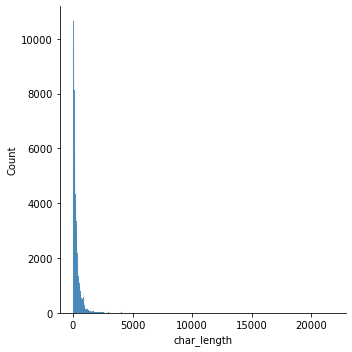

In [ ]:
import seaborn as sns

ver1['char_length'] = ver1['cleaned_comment'].apply(lambda x: len(str(x)))

sns.displot(ver1['char_length']);

In [ ]:
ver1_trim = ver1[(ver1.char_length <= 512)]
ver1_trim = ver1_trim[['target','cleaned_comment']]

ver1_trim.to_csv('finaldata.csv', index=False)
print(len(ver1_trim))
print(ver1_trim['target'].value_counts())

301001
1.0    155565
0.0    145436
Name: target, dtype: int64


## Ver2. lemmatizing & change some target words to token

In [ ]:
!pip install -U nltk

Requirement already up-to-date: nltk in c:\users\user\anaconda3\lib\site-packages (3.6.2)


In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

text = 'FUCKing you bitches'
text = text.lower().split()
text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
text

'fuck you bitch'

In [ ]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
target = ['gay', 'gays', 'homosexual', 'lesbian', 'LGBT', 'moslem', 'muslim', 'jew', 'jews' 'blacks', 'nigga', 'niggas']

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = [w for w in text.split() if len(w)>1] #remove single alphabet in the sentence
    text = [w if w not in target else '[TARGET]' for w in text]
    text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [ ]:
import time

start = time.time()
ver2 = ver1.copy()
ver2['cleaned_comment'] = ver2['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 1515.28 secs are taken


In [ ]:
org_len = len(ver2)
ver2 = ver2[(ver2.cleaned_comment != '')]
print(f'Total {org_len-len(ver2)} of datas are removed')

Total 1088 of datas are removed


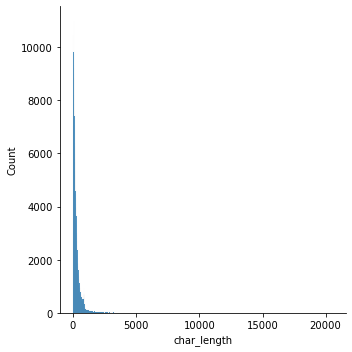

In [ ]:
import seaborn as sns

ver2['char_length'] = ver2['cleaned_comment'].apply(lambda x: len(str(x)))

sns.displot(ver2['char_length']);

In [ ]:
ver2_trim = ver2[(ver2.char_length <= 512)]
ver2_trim = ver2_trim[['target','cleaned_comment']]

ver2_trim.to_csv('finaldata_ver2.csv', index=False)
print(len(ver2_trim))
print(ver2_trim['target'].value_counts())

304850
1.0    157637
0.0    147213
Name: target, dtype: int64


## Ver3. Context dataset

In [ ]:
sig_non = 0
con_non = 0
sig_tox = 0
con_tox = 0

for i, (target, cmmts) in enumerate(zip(context.target, context.cmmt_list)):
    if len(cmmts) == 2 and target == 1:
        con_tox+=1
    elif len(cmmts) == 2 and target == 0:
        con_non+=1
    elif len(cmmts) == 1 and target == 1:
        sig_tox+=1
    elif len(cmmts) == 1 and target == 0:
        sig_non+=1
    else:
        print('IDX:',i,'LEN:',len(cmmts),'TARGET:',target)
        
print(f'con_tox : {con_tox}',f'con_non : {con_non}',f'sig_tox : {sig_tox}',f'sig_non : {sig_non}',sep='\n')

con_tox : 12220
con_non : 6888
sig_tox : 19611
sig_non : 18257


In [ ]:
import re
import unicodedata

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = ' '.join([w for w in text.split() if len(w)>1]) #remove single alphabet in the sentence
    #text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

removed_data = ['removed','[removed]',['removed'],'deleted','[deleted]',['deleted']]

def preprocessing(comment):
    try:
        if type(comment) == str:
            return clean_text(comment)
        elif type(comment) == list:
            global cnt
            cnt+=1
            comments = []
            for text in comment:
                if text in removed_data:
                    print('deleted removed data')
                    continue
                text = clean_text(text)
                comments.append(text)
            return comments
        else:
            print(type(comment))
    except:
        print(comment)

In [ ]:
import time

cnt=0
start = time.time()
context['cleaned_comment'] = context['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')
print(f'Total {cnt} lists are cleaned')

[nan]
Preprocessing is finished: 12.01 secs are taken
Total 56976 lists are cleaned


In [ ]:
org_len = len(context)
context = context.dropna()
print(context.target.value_counts())
print(org_len-len(context))

1    31831
0    25144
Name: target, dtype: int64
1


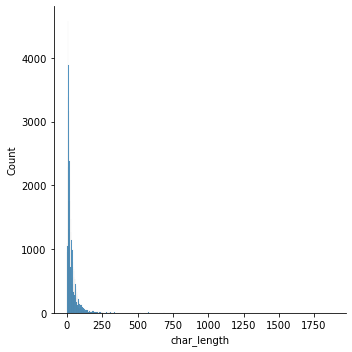

In [ ]:
import seaborn as sns

context['char_length'] = context['cleaned_comment'].apply(lambda x: len(' [SEP] '.join(x).split()))

sns.displot(context['char_length']);

In [ ]:
context_trim = context[['target','cleaned_comment']]
context_trim.to_csv('context_add.csv', index=False)
print(len(context_trim))
#print(context_trim['target'].value_counts())

56975


## Test dataset

In [ ]:
gao = gao.rename(columns={'label':'target'})
test = gao[['target','cmmt_list']]

test

,target,cmmt_list
0,1,[German lawmakers approve 'no means no' rape l...
1,1,[German lawmakers approve 'no means no' rape l...
2,0,[German lawmakers approve 'no means no' rape l...
3,1,[German lawmakers approve 'no means no' rape l...
4,1,[German lawmakers approve 'no means no' rape l...
...,...,...
1523,1,[Fury as feminist blames toddler alligator dea...
1524,1,[Fury as feminist blames toddler alligator dea...
1525,1,[Fury as feminist blames toddler alligator dea...
1526,1,[Fury as feminist blames toddler alligator dea...


In [ ]:
import re
import unicodedata

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub(' f ', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    cnt=0
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        cnt+=1
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [ ]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
target = ['gay', 'gays', 'homosexual', 'lesbian', 'LGBT', 'moslem', 'muslim', 'jew', 'jews' 'blacks', 'nigga', 'niggas']

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clean_text(text):
    text = text.lower().strip()
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    text = re.sub(r'[\r|\t|\n]', ' ', text)
    text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:\da-f]{2}))+','',text) #url 제거
    text = re.sub('(\[a-z0-9\_.+-\]+@\[a-z0-9-\]+.\[a-z0-9-.\]+)','',text) #email 제거
    text = re.sub('<[^>]*>','',text) #html tag 제거
    text = re.sub(r"[^a-z.!?]+", r" ", text) #문자+문장부호만 빼고 모두 제거
    text = re.sub(r"([.!?])", r" \1", text) #문장부호는 \1로 대체
    text = re.sub(' the ', ' ', text)
    text = re.sub(' a ', ' ', text)
    text = re.sub(' u ', 'you ', text)
    text = re.sub(' ur ', ' your ', text)
    text = re.sub(' y ', 'why ', text)
    text = [w for w in text.split() if len(w)>1] #remove single alphabet in the sentence
    text = [w if w not in target else '[TARGET]' for w in text]
    text = ' '.join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tag(text)])
    text = re.sub(' ciu ', 'see you ', text)
    text = re.sub(' da ', 'dumb ass ', text)
    text = re.sub(' fug ', 'fuck ugly ', text)
    text = re.sub('gratest', 'greatest ', text)
    text = re.sub('sh\*t', 'shit ', text)
    text = re.sub('s\*\*t', 'shit ', text)
    text = re.sub('f\*ck', 'fuck ', text)
    text = re.sub('fu\*k', 'fuck ', text)
    text = re.sub('f\*\*k', 'fuck ', text)   
    text = re.sub('f\*\*\*\*\*g', 'fuck ', text)
    text = re.sub('p\*ssy', 'pussy ', text)
    text = re.sub('p\*\*\*y', 'pussy ', text)
    text = re.sub('pu\*\*y', 'pussy ', text)
    text = re.sub('p\*ss', 'piss ', text)
    text = re.sub('b\*tch', 'bitch ', text)
    text = re.sub('bit\*h', 'bitch ', text)
    text = re.sub(' btch ', 'bitch ', text)
    text = re.sub(' bch ', 'bitch ', text)
    text = re.sub('h\*ll', 'hell ', text)
    text = re.sub('h\*\*l', 'hell ', text)
    text = re.sub('cr\*p', 'crap ', text)
    text = re.sub('d\*mn', 'damn ', text)
    text = re.sub('stu\*pid', 'stupid ', text)
    text = re.sub('st\*pid', 'stupid ', text)
    text = re.sub('n\*gger', 'nigger ', text)
    text = re.sub('n\*\*\*ga', 'nigger ', text)
    text = re.sub('f\*ggot', 'faggot ', text)
    text = re.sub('scr\*w', 'screw ', text)
    text = re.sub('pr\*ck', 'prick ', text)
    text = re.sub('g\*d', 'god ', text)
    text = re.sub('s\*x', 'sex ', text)
    text = re.sub('a\*s', 'ass ', text)
    text = re.sub('a\*\*hole', 'asshole ', text)
    text = re.sub('a\*\*\*ole', 'asshole ', text)
    text = re.sub('a\*\*', 'ass ', text)    
    text = re.sub(r"im ", "i am ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

def preprocessing(comment):
    if type(comment) == str:
        return clean_text(comment)
    elif type(comment) == list:
        comments = []
        for text in comment:
            if text == 'removed' or text == '[removed]' or text == ['removed']:
                continue
            text = clean_text(text)
            comments.append(text)
        return ' [SEP] '.join(comments)
    else:
        print(type(comment))

In [ ]:
import time

start = time.time()
test['cleaned_comment'] = test['cmmt_list'].apply(lambda x: preprocessing(x))
print(f'Preprocessing is finished: {time.time()-start:.2f} secs are taken')

Preprocessing is finished: 7.70 secs are taken


<ipython-input-9-afcfad48df11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cleaned_comment'] = test['cmmt_list'].apply(lambda x: preprocessing(x))


In [ ]:
org_len = len(test)
test = test[(test.cleaned_comment != '')]
print(f'Total {org_len-len(test)} of datas are removed')

Total 0 of datas are removed


In [ ]:
test['char_length'] = test['cleaned_comment'].apply(lambda x: len(str(x)))
test_trim = test[(test.char_length <= 512)]
test_trim = test_trim[['target','cleaned_comment']]

test_trim.to_csv('test_ver2.csv', index=False)
print(len(test_trim))
print(test_trim['target'].value_counts())

1456
0    1054
1     402
Name: target, dtype: int64
